# --- Day 21: Fractal Art ---

http://adventofcode.com/2017/day/21

You find a program trying to generate some art. It uses a strange process that involves repeatedly enhancing the detail of an image through a set of rules.

The image consists of a two-dimensional square grid of pixels that are either on (#) or off (.). The program always begins with this pattern:

```
.#.
..#
###
```

In [122]:
# the puzzle input
with open('puzzle_inputs/day21_input.txt') as f:
    data = f.read().strip().split("\n")
puzzle_input = [line for line in data]
puzzle_input[:10]

['../.. => ..#/##./#..',
 '#./.. => #../.#./...',
 '##/.. => ##./#../##.',
 '.#/#. => ..#/##./.#.',
 '##/#. => ..#/#.#/.##',
 '##/## => ##./..#/#.#',
 '.../.../... => ###./#..#/##.#/.#.#',
 '#../.../... => ##.#/#..#/####/#.##',
 '.#./.../... => ###./###./#.##/...#',
 '##./.../... => ##.#/..../##../##..']

Every art pattern starts with this:

In [5]:
seed = "/".join(""".#.
..#
###""".split("\n"))
seed

'.#./..#/###'

I'm going to store all the enhancement rules in a dictionary to be able to look them up and apply easily. However, dicts can't hash arrays, so first up a couple of helper functions to convert our pattern strings to a 2d grid for enhancement, then back to string form for storing in the dict:

In [123]:
import numpy as np

def convert_to_grid(s):
    """takes in a string and returns a 2d grid representation"""
    rows = [np.array([c for c in row], dtype="U") for row in s.split("/")]
    return np.array(rows, dtype="U")

grid = convert_to_grid(seed)
grid

array([['.', '#', '.'],
       ['.', '.', '#'],
       ['#', '#', '#']],
      dtype='<U4')

In [124]:
def convert_to_string(grid):
    """takes a 2d grid and returns a / seperated string version"""
    s = ["".join(row) for row in grid]
    return "/".join(s)

convert_to_string(grid)

'.#./..#/###'

to eyeball the grid better:

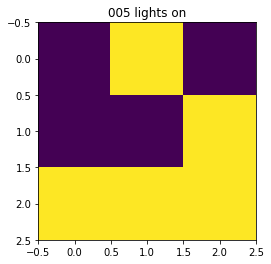

In [151]:
import matplotlib.pyplot as plt

def plot_pattern(seed=seed):
    """takes in a pattern as a string and plots it"""
    grid = convert_to_grid(seed)
    binary_grid = [c == "#" for c in [row for row in grid]]
    plt.imshow(binary_grid)
    plt.title(f"{seed.count('#'):03} lights on")
    plt.show()
    
plot_pattern()

First up, converting the rules from a list of strings into a dict:

In [125]:
def make_rules(puzzle_input=puzzle_input, verbose=False):
    """takes in the rules as a list of strings and returns a dict"""
    rules = dict()
    
    for row in puzzle_input:
        pattern, enhance = row.split(" => ")
        for i in range(4):
            rot = np.rot90(convert_to_grid(pattern), i)
            rules[convert_to_string(rot)] = enhance
            rules[convert_to_string(np.flipud(rot))] = enhance
    
    return rules
        
rules = make_rules(verbose=False)
len(rules)

528

In [108]:
def enhance(seed=seed, rules=rules):
    """takes in a seed as a string, and enhances it N times as per rules provided"""
    
    p = convert_to_grid(seed)
    size = 2 if len(p) % 2 == 0 else 3
    new_grid_size = (len(p)*(size+1)) // size
    new_grid = np.empty((new_grid_size,new_grid_size), dtype="U")
    nsize = size + 1 # size of slice of new pattern
    
    if len(p) == size:
        return rules[seed]
    
    # now to slice and dice
    squares = [i for i in range(0,len(p), size)]
    new_squares = [i for i in range(0,len(new_grid), size+1)]
    
    for i, ii in zip(squares, new_squares):
        for j, jj in zip(squares, new_squares):
            slice = p[i:i+size,j:j+size]
            
            new_p = rules[convert_to_string(slice)]
            new_grid[ii:ii+nsize,jj:jj+nsize] = convert_to_grid(new_p)
    
    return convert_to_string(new_grid)

print(enhance(seed))
enhance('#.../###./#.##/#.##')

#.../###./#.##/#.##


'..##../#.#.#./.##.../##.##./#....#/##.#.#'

Now to solve part 1:

Round 01: #.../###./#.##/#.##                     ... has 010 lights on
Round 02: ..##../#.#.#./.##.../##.##./#....#/##.#.... has 017 lights on
Round 03: #....##../.#.#.#.#./....##.../..#..##../... has 032 lights on
Round 04: ..###.....##/.#.####..#.#/.##.#.##.##./.... has 073 lights on
Round 05: #....#..##..#....#/.#.#.##.#.#..#.#.#/..... has 136 lights on


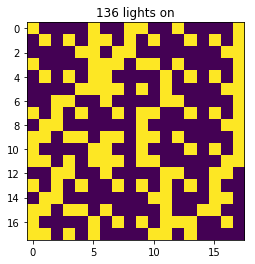

In [152]:
def enhance_multiple(a=seed, N=5):
    """takes in a pattern and enhances it N times"""
    for i in range(N):
        a = enhance(a)
        print(f"Round {i+1:02}: {a[:40]:40}... has {a.count('#'):03} lights on")
    return a   

enhanced = enhance_multiple(seed, 5)
plot_pattern(enhanced)

`136` is the answer for part 1.

## Part two

This is the same a 1, just done 18 times:

Round 01: #.../###./#.##/#.##                     ... has 010 lights on
Round 02: ..##../#.#.#./.##.../##.##./#....#/##.#.... has 017 lights on
Round 03: #....##../.#.#.#.#./....##.../..#..##../... has 032 lights on
Round 04: ..###.....##/.#.####..#.#/.##.#.##.##./.... has 073 lights on
Round 05: #....#..##..#....#/.#.#.##.#.#..#.#.#/..... has 136 lights on
Round 06: ..##..##.#....##....##..##./##..#.#...#.... has 287 lights on
Round 07: ......##.#.#..###.....##......##.#.#/.#.... has 642 lights on
Round 08: #....##....##..##.#....#..##..#....##...... has 1215 lights on
Round 09: ..##....#..##..##...###.#....##..##.#...... has 2613 lights on
Round 10: ......##..........##.#.#.....#.#..##....... has 5733 lights on
Round 11: #....##....##....##....##....##..##.#...... has 10933 lights on
Round 12: ..##....#..##..##...##....#..##....#..##... has 23586 lights on
Round 13: ......##..........##.#.#......##........... has 51487 lights on
Round 14: #....##....##....##....##....##..##.#...... h

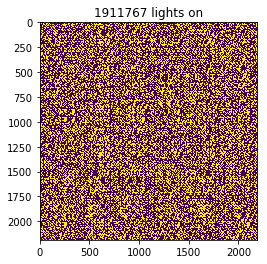

In [153]:
enhanced = enhance_multiple(seed, 18)
plot_pattern(enhanced)

`1911767` is the answer for part 2

# Notes

- check num of rotations and flips, am I doing more than needed?
- animate the ever larger growing pattern